# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [1]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
 
import statsmodels.api as sm
 
from sklearn import metrics
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             recall_score, 
                             precision_score)

In [2]:

url_dataset = 'https://raw.githubusercontent.com/lopes-andre/datasets/main/pima-indians-diabetes.csv'

data = pd.read_csv(url_dataset)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(f'Shape dos dados: {data.shape}\n')
 
print(f'Esta base de dados tem {data.shape[0]} linhas e {data.shape[1]} colunas.')

Shape dos dados: (768, 9)

Esta base de dados tem 768 linhas e 9 colunas.


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().values.any()

False

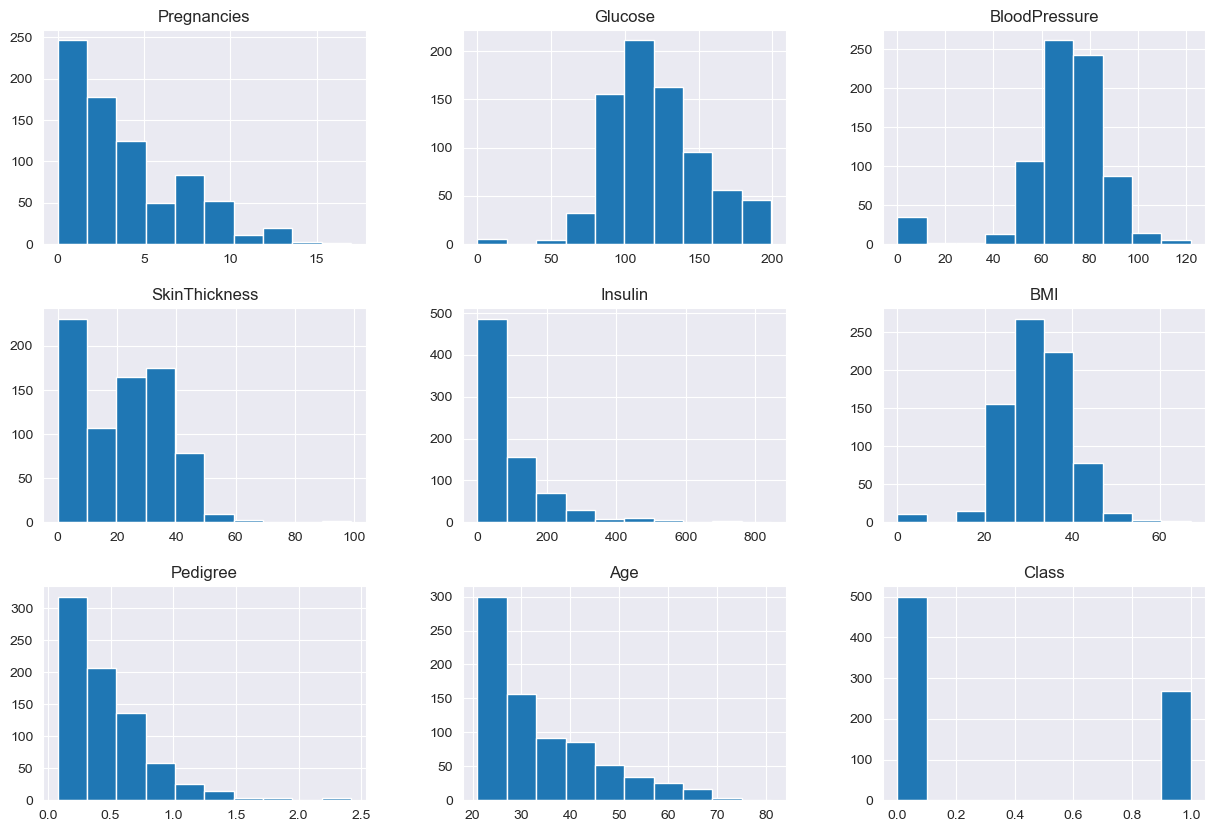

In [7]:
sns.set_style('darkgrid')
data.hist(figsize=(15,10))
plt.show()

In [8]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 
        'Insulin', 'BMI', 'Pedigree']

data[cols] = data[cols].replace(0, np.nan)

In [9]:
data.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Pedigree           0
Age                0
Class              0
dtype: int64

In [10]:
data[cols] = data[cols].fillna(data[cols].mean())

In [11]:
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Class            0
dtype: int64

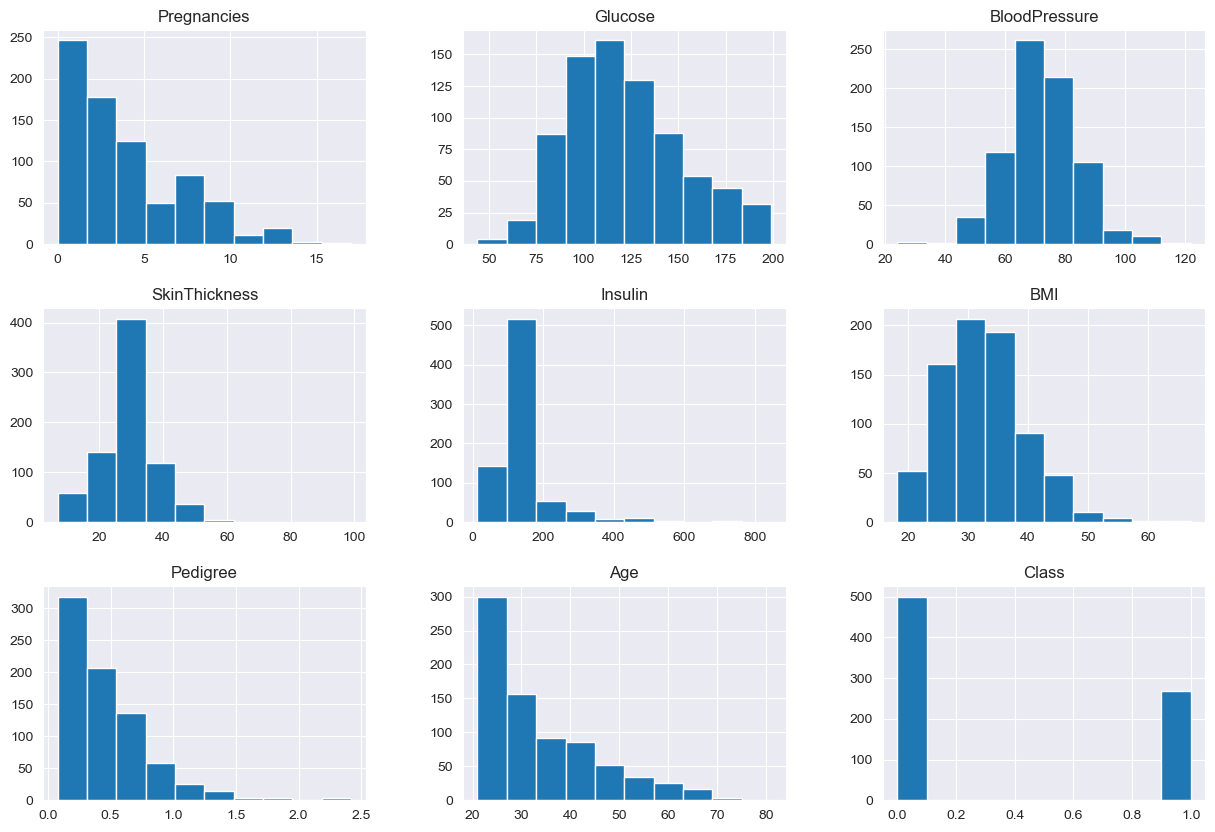

In [12]:
sns.set_style('darkgrid')
data.hist(figsize=(15,10))
plt.show()

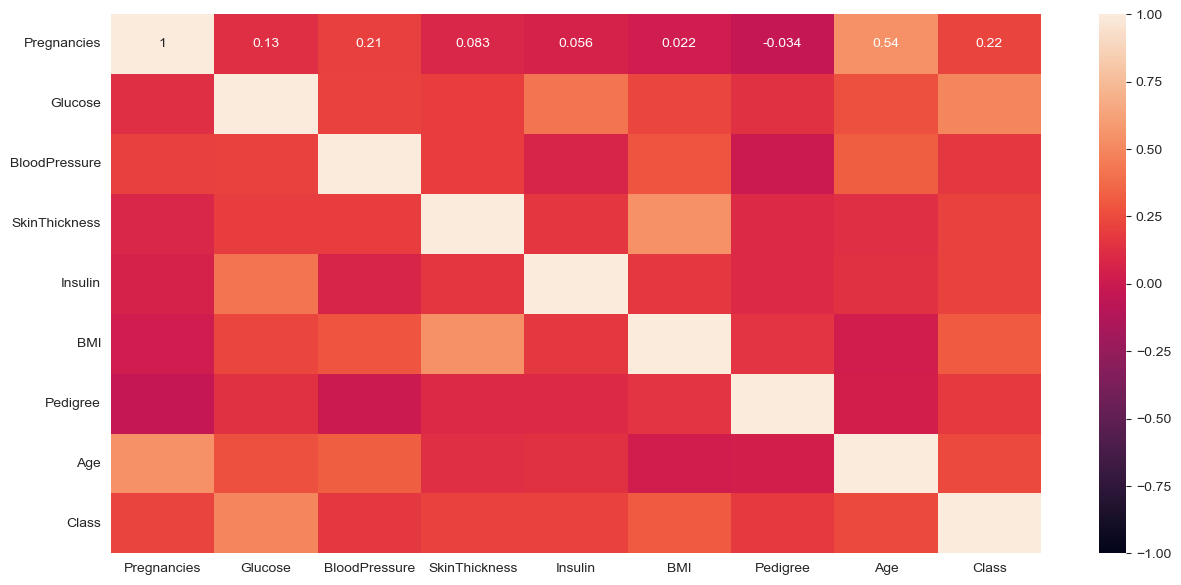

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [14]:
data['Class'].value_counts()

Class
0    500
1    268
Name: count, dtype: int64

In [15]:
data['Class'].value_counts(normalize=True)

Class
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [16]:
X = data.drop(['Class'], axis=1)
 
y = data['Class']
 
X = sm.add_constant(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.30,
                                                   random_state=1,
                                                   stratify=y) # mantém as proporções das classes


In [18]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.449508
         Iterations 6


In [19]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  537
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            8
Date:                Sat, 23 Mar 2024   Pseudo R-squ.:                  0.3045
Time:                        18:35:43   Log-Likelihood:                -241.39
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 2.518e-41
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.7226      1.021     -9.522      0.000     -11.724      -7.721
Pregnancies       0.1445      0.039      3.706      0.000       0.068       0.221
Glucose           0.0363      0.005     

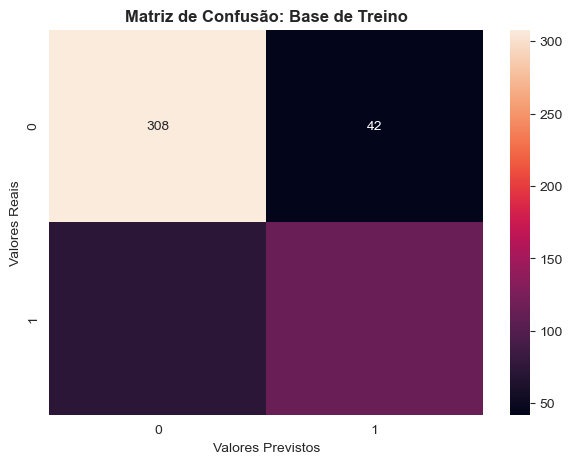

In [20]:
pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)
 
cm = confusion_matrix(y_train, pred_train)
 
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Matriz de Confusão: Base de Treino', weight='bold')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.show()

In [21]:

# Acurácia
acc = accuracy_score(y_train, pred_train)
# Precisão
prec = precision_score(y_train, pred_train)
# Recall
rec = recall_score(y_train, pred_train)
 
print(f'Acurácia na base de treino: {round(acc, 2) * 100}%')
print(f'Precisão na base de treino: {round(prec, 2) * 100}%')
print(f'Recall na base de treino: {round(rec, 2) * 100}%')

Acurácia na base de treino: 79.0%
Precisão na base de treino: 73.0%
Recall na base de treino: 61.0%
